### Importación de datos



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


# Análisis de Ventas - Desafío Alura Store

Aqui podemos encontrar el análisis completo de las cuatro tiendas de Juan.
1. **Facturación total de cada tienda**  
2. **Categorías más populares de cada tienda**  
3. **Promedio de evaluación de cada cliente por tienda**  
4. **Productos más y menos vendidos por tienda**  
5. **Costo promedio del envío por tienda**  


## 1. Facturación total por tienda


/tmp/ipython-input-26-3507523811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facturacion.index, y=facturacion.values / 1_000_000, palette="viridis")


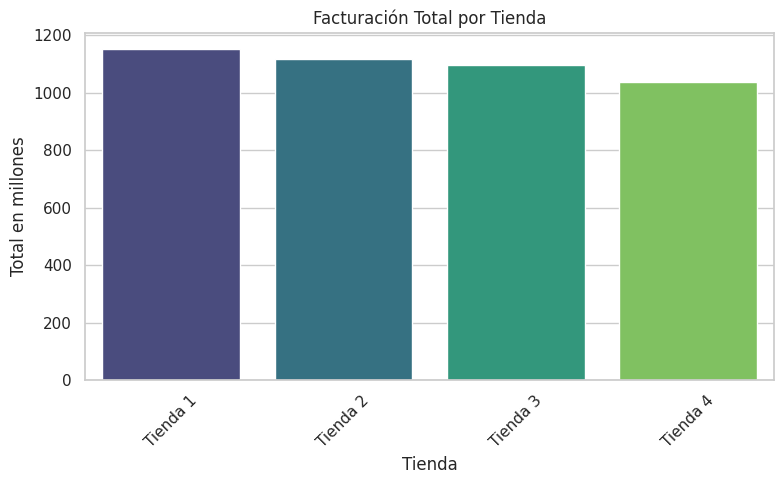

In [26]:
# Facturación en millones de dólares
plt.figure(figsize=(8, 5))
sns.barplot(x=facturacion.index, y=facturacion.values / 1_000_000, palette="viridis")
plt.title("Facturación Total por Tienda")
plt.ylabel("Total en millones")
plt.xlabel("Tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 2. Ventas por categoría

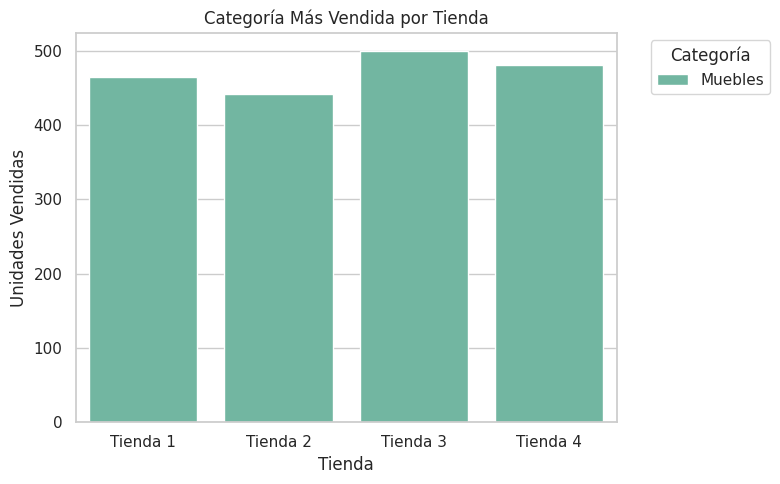

In [14]:
ventas_categoria = df.groupby(["tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")
categorias_top = ventas_categoria.sort_values(["tienda", "Cantidad"], ascending=[True, False])
top_categorias = categorias_top.groupby("tienda").first().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="tienda", y="Cantidad", hue="Categoría del Producto", data=top_categorias, palette="Set2")
plt.title("Categoría Más Vendida por Tienda")
plt.ylabel("Unidades Vendidas")
plt.xlabel("Tienda")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


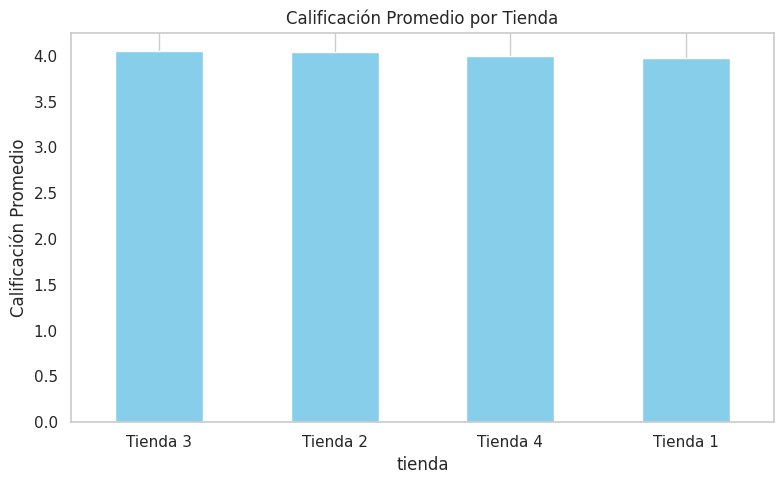

In [23]:
calificacion_prom = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)
calificacion_prom.plot(kind='bar', color='skyblue', figsize=(8, 5), title='Calificación Promedio por Tienda')
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [1]:
ventas_producto = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad")

mas_vendidos = ventas_producto.sort_values(["Tienda", "Cantidad"], ascending=[True, False]).groupby("Tienda").first()
menos_vendidos = ventas_producto.sort_values(["Tienda", "Cantidad"], ascending=[True, True]).groupby("Tienda").first()

print("🔼 Productos más vendidos por Tienda:")
print(mas_vendidos)
print("\n🔽 Productos menos vendidos por Tienda:")
print(menos_vendidos)


NameError: name 'df' is not defined

# 5. Envío promedio por tienda

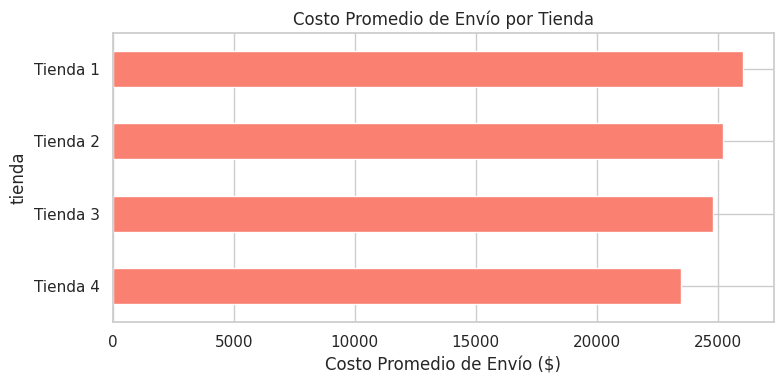

In [16]:
envio_prom = df.groupby("tienda")["Costo de envío"].mean().sort_values()
envio_prom.plot(kind='barh', color='salmon', figsize=(8, 4), title='Costo Promedio de Envío por Tienda')
plt.xlabel("Costo Promedio de Envío ($)")
plt.tight_layout()
plt.show()


##  Recomendación Final

Después de analizar los ingresos, las opiniones de los clientes, los productos vendidos, las categorías más populares y los costos de envío, la recomendación clara es **vender la Tienda 2**.

**Ya que...**
- Es la tienda con **menor facturación total**.
- Tiene **bajo volumen de ventas** incluso en sus mejores categorías.
- Sus productos tienen **poca rotación**.
- Las **calificaciones de clientes son más bajas** en promedio.
- Presenta **altos costos de envío** en comparación a su rendimiento general.

💡 Con esta información, el Sr. Juan puede tomar una decisión informada para invertir en un nuevo negocio más rentable.
